# 01 Creating an image

* 간단한 이미지 생성 예제입니다.
* numpy array를 자료 구조로 사용하고 matplotlib으로 시각화 합니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

각 컬러 값이 float (0 ~ 1)로 쓰여진 이미지를 unsigned byte (0 ~ 255)로 변환하는 함수입니다.
* 일반적인 이미지에서 각 컬러 값은 unsigned byte로 쓰여집니다.
* 각 컬러 값이 float인 이미지는 영상 처리나 HDR 이미지에서 사용됩니다.

이번 예제에서만 unsigned byte인 이미지를 사용하고 이후 부터는 float 이미지를 그대로 사용합니다.

In [2]:
def to_pixel_color(fcolor: np.array):
    return (255.999 * fcolor).astype(dtype=np.uint8)


이미지의 자료구조는 numpy array를 사용
* 행렬기반 자료구조 이기 때문에 차원이 순서는 row, column, channel 입니다.
* fimage: 각 컬러 값이 float인 이미지 입니다. 이 예제에서는 이미지를 계산할 때만 사용합니다.
* image: 각 컬러 값이 unsigned byte인 이미지 입니다. 이미지를 생성/그린 후 시각화할 때 사용합니다.

이미지의 채널은 height, width, 그리고 color channel의 갯수 순 입니다. 여기서는 RGB 컬러를 사용하기 때문에 color channel은 3개 입니다.


In [3]:
image_width = 256
image_height = 256
fimage = np.zeros([image_height, image_width, 3])
image = np.zeros([image_height, image_width, 3], dtype=np.uint8)

이미지의 각 컬러 값을 작성합니다.
* 이미지에서 픽셀의 시작 위치는 왼쪽 하단 입니다.
  * 이미지의 행은 밑에서 위로 작성합니다.
  * 이미지의 행에서 각 픽셀은 좌에서 우로 작성합니다.
* 각 채널 값의 범위는 0 ~ 1 입니다.
* 빨강 채널은 값은 이미지의 아래의 1에서 위의 0으로 감소합니다.
* 초록 채널은 값은 이미지의 좌의 1에서 우의 0으로 감소합니다.
* 파랑 채널은 값은 0.25 입니다.

In [4]:
for row in range(image_height):
    for col in range(image_width):
        r = float(col) / (image_width - 1)
        g = float(row) / (image_height - 1)
        b = 0.25
        fimage[row, col] = np.array([r, g, b])
image = to_pixel_color(fimage)

matplotlib으로 이미지를 시각화 합니다.
* plt.imshow의 origin은 이미지의 좌표 (0, 0)인 위치가 아래(lower)인지 위(upper)인지 결정합니다. 여기서는 아래입니다.
    * plt.imshow의 기본 origin은 upper입니다.
* plt.imshow는 컬러 이미지의 경우 각 채널의 값이 0.0 ~ 1.0 인 float 이미지나 0 ~ 255인 unsigned byte 이미지를 지원합니다.

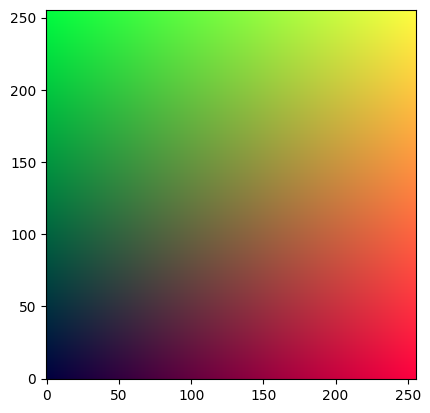

In [5]:
plt.imshow(image, origin='lower')
plt.show()